# 📊 Projeto Final – Análise Contábil com Ajuste Econômico

Este projeto tem como objetivo integrar análise de dados contábeis de empresas com indicadores econômicos, utilizando Python, Pandas, Ipeadata e Streamlit.

1) Configure o título na barra do navegador, da página do projeto no Streamlit e descrição inicial do projeto (peso: 1,0)

- Título na barra (`page_title`): Lista de Exercícios 4
- Título da página (`header`): Projeto Final – Análise Contábil com Ajuste Econômico
- Descrição projeto (`write`): Este projeto tem como objetivo integrar análise de dados contábeis de empresas com indicadores econômicos, utilizando Python, Pandas, Ipeadata e Streamlit.

In [3]:
!pip install pandas

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [8]:
import streamlit as st

st.set_page_config(
    page_title="Lista de Exercícios 4"
)

st.header("Projeto Final – Análise Contábil com Ajuste Econômico")

st.write(
    "Este projeto tem como objetivo integrar análise de dados contábeis de empresas "
    "com indicadores econômicos, utilizando Python, Pandas, Ipeadata e Streamlit."
)

2025-06-17 14:30:05.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:05.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:05.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:05.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:05.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2) Importe os dados do arquivo empresas_dados.csv utilizando pandas e apresente todas as linhas da df (peso: 1,0)

Dica: Utilize `head(len(df))`

In [9]:
import pandas as pd
df = pd.read_csv('/content/empresas_dados.csv', sep=";")
st.dataframe(df.head(len(df)))


2025-06-17 14:30:07.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:07.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

3) Calcule os indicadores Margem Líquida e ROA e salve como novas coluna da df. Depois apresente os dois indicadores no mesmo gráfico de linhas, agrupado por Ano  (peso: 1,0)

- Margem Líquida = Lucro Líquido / Receita Líquida * 100
- ROA = Lucro Líquido / Ativo Total *  100

2025-06-17 14:30:09.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:10.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 14:30:10.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

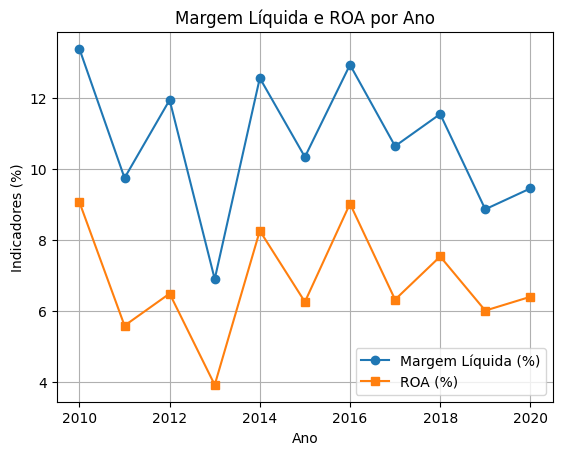

In [10]:

df["Margem Líquida"] = (df["Lucro Líquido"] / df["Receita Líquida"]) * 100
df["ROA"] = (df["Lucro Líquido"] / df["Ativo Total"]) * 100

df_grouped = df.groupby("Ano")[["Margem Líquida", "ROA"]].mean().reset_index()

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df_grouped["Ano"], df_grouped["Margem Líquida"], marker="o", label="Margem Líquida (%)")
ax.plot(df_grouped["Ano"], df_grouped["ROA"], marker="s", label="ROA (%)")

ax.set_xlabel("Ano")
ax.set_ylabel("Indicadores (%)")
ax.set_title("Margem Líquida e ROA por Ano")
ax.legend()
ax.grid(True)

st.pyplot(fig)


4) Utilize o pacote ipeadatapy e faça busca para encontrar o indicador que traga o IPCA, taxa de variação, em % e anual: (peso: 2,0)

- Baixe os dados no período de 2010 a 2024
- Altere o nome da coluna "YEAR" para "Ano"
- Altere o nome da coluna "VALUE ((% a.a.))" para "IPCA"
- Apresente a df para checar se tudo deu certo

In [11]:
!pip install ipeadatapy

In [12]:
import ipeadatapy as ip
import pandas as pd

df_ipca = ip.timeseries('PRECOS12_IPCA12')

df_ipca = df_ipca[(df_ipca['YEAR'] >= 2010) & (df_ipca['YEAR'] <= 2024)]

print("Colunas antes da renomeação:")
print(df_ipca.columns)

df_ipca = df_ipca.rename(columns={
    'YEAR': 'Ano',
    'VALUE (-)': 'IPCA'
})

print("\nColunas após a renomeação:")
print(df_ipca.columns)

print("\nDataFrame resultante:")
df_ipca


Colunas antes da renomeação:
Index(['CODE', 'RAW DATE', 'DAY', 'MONTH', 'YEAR', 'VALUE (-)'], dtype='object')

Colunas após a renomeação:
Index(['CODE', 'RAW DATE', 'DAY', 'MONTH', 'Ano', 'IPCA'], dtype='object')

DataFrame resultante:


,CODE,RAW DATE,DAY,MONTH,Ano,IPCA
DATE,,,,,,
2010-01-01,PRECOS12_IPCA12,2010-01-01T00:00:00-02:00,1,1,2010,3040.22
2010-02-01,PRECOS12_IPCA12,2010-02-01T00:00:00-02:00,1,2,2010,3063.93
2010-03-01,PRECOS12_IPCA12,2010-03-01T00:00:00-03:00,1,3,2010,3079.86
2010-04-01,PRECOS12_IPCA12,2010-04-01T00:00:00-03:00,1,4,2010,3097.42
2010-05-01,PRECOS12_IPCA12,2010-05-01T00:00:00-03:00,1,5,2010,3110.74
...,...,...,...,...,...,...
2024-08-01,PRECOS12_IPCA12,2024-08-01T00:00:00-03:00,1,8,2024,6966.50
2024-09-01,PRECOS12_IPCA12,2024-09-01T00:00:00-03:00,1,9,2024,6997.15
2024-10-01,PRECOS12_IPCA12,2024-10-01T00:00:00-03:00,1,10,2024,7036.33


5) Combine as duas df (Excel e IPEA) em uma nova df e calcule nova coluna chamada Receita Real (peso: 2,0)

- Utilize a função `pd.merge()` para unificar as duas df utiilizando a coluna Ano como conexão (chave primária) entre elas
- Crie nova coluna chamada Receita Real que será o resultado da Receita Líquida de cada ano deduzido o IPCA do ano: `Receita Real = Receitta Líquida - ( Receita Líquida * (IPCA/100) )`
- Apresente a nova df combinada


In [ ]:
import pandas as pd

df_excel = pd.DataFrame({
    'Ano': [2020, 2021, 2022],
    'Receita Líquida': [1000, 1200, 1400]
})

df_ipea = pd.DataFrame({
    'Ano': [2020, 2021, 2022],
    'IPCA': [3.5, 4.0, 5.0]
})

df_combined = pd.merge(df_excel, df_ipea, on='Ano')
df_combined['Receita Real'] = df_combined['Receita Líquida'] * (1 - df_combined['IPCA'] / 100)

df_combined



,Ano,Receita Líquida,IPCA,Receita Real
0,2020,1000,3.5,965.0
1,2021,1200,4.0,1152.0
2,2022,1400,5.0,1330.0


6) Crie gráfico de linha que apresente as variáveis Receita Líquida e Receita Real ao longo dos anos (no mesmo gráfico) (peso: 1,0)

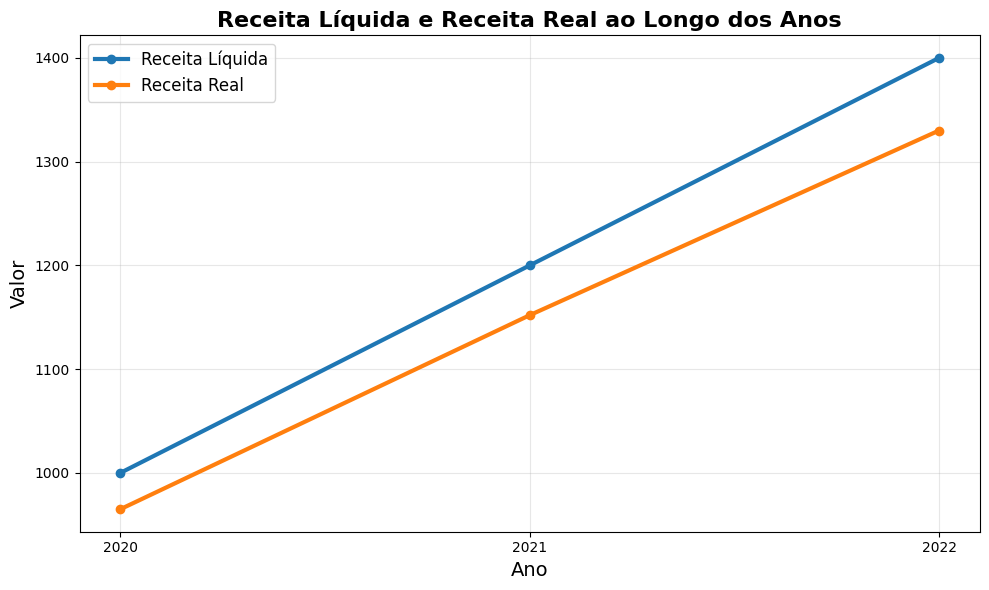

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Ano': [2020, 2021, 2022],
    'Receita Líquida': [1000, 1200, 1400],
    'Receita Real': [965, 1152, 1330]
})

plt.figure(figsize=(10, 6))
plt.plot(df['Ano'], df['Receita Líquida'], marker='o', label='Receita Líquida', linewidth=3)
plt.plot(df['Ano'], df['Receita Real'], marker='o', label='Receita Real', linewidth=3)

plt.title('Receita Líquida e Receita Real ao Longo dos Anos', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.xticks(df['Ano'])
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


7) Faça os ajustes necessários e leve este projeto para a web usando GitHub e Streamlit (peso: 2,0)

- Caça os ajustes necessários no projeto para ser publicado no Streamlit
- Crie novo repositório público no GitHub e leve os arquivos .py e .csv pra lá. Aproveite e crie o arquivo requirements.txt com os pacotes utilizados no projeto
- Crie novo projeto no Streamlit e associe ao repositório da lista